# Regression and Forcasting Analysis

In [35]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import statsmodels as smodels
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
# need to determine the model I will use
# 

In [3]:
path ='../Resources/Data/Price_Data/coffee-prices-historical-chart-data.csv'
Price_DF = pd.read_csv(path, header=8)
Price_DF.head(-1)

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660
5,1973-08-27,0.6590
6,1973-08-28,0.6400
7,1973-08-29,0.6345
8,1973-08-30,0.6387
9,1973-08-31,0.6402


In [4]:
Price_DF.dtypes

date       object
 value    float64
dtype: object

In [5]:
Price_DF['date'] = Price_DF['date'].astype('datetime64')

In [6]:
Price_DF.dtypes


date      datetime64[ns]
 value           float64
dtype: object

In [7]:
Price_DF.rename({' value': 'value'}, inplace=True)


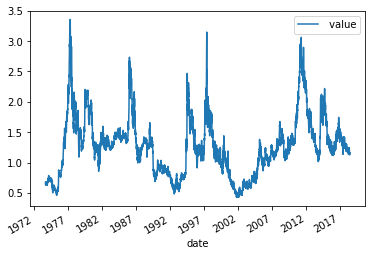

In [8]:
Price_DF.plot(x='date', y=' value')
plt.show()

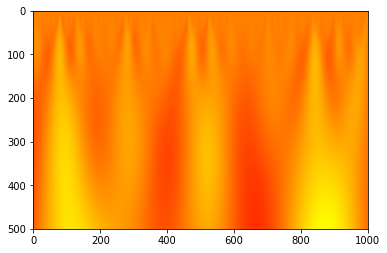

In [9]:
widths = np.arange(1, 1000)
cwtmatr = signal.cwt(Price_DF[' value'], signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1000, 500, 1], cmap='autumn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [10]:
Price_DF.mean()

 value    1.267372
dtype: float64

In [11]:
Auto_Corr = []
lag = []
for i in range(60):
    lag.append(i)
    Auto_Corr.append(Price_DF.loc[0:365,' value'].autocorr(i))

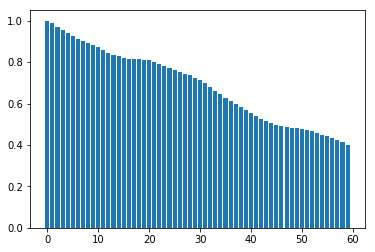

In [12]:
plt.bar(lag, Auto_Corr)
plt.show()

1826


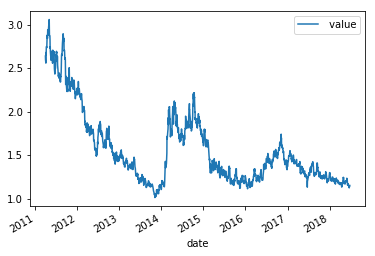

In [13]:
Price_DF.loc[9403:11228,:].plot(x='date', y=' value')
print(len(Price_DF.loc[9403:11228,:]))

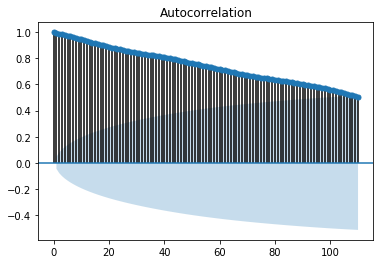

In [14]:
plot_acf(Price_DF.loc[9403:11228,' value'], lags=110)
plt.show()

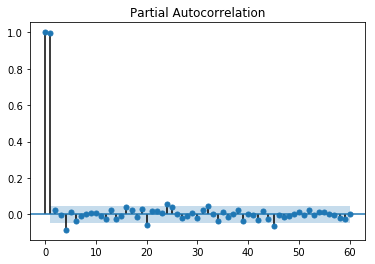

In [15]:
plot_pacf(Price_DF.loc[9403:11228,' value'], lags=60)
plt.show()

In [16]:
Diff_Price = Price_DF.loc[9403:11228,' value'].diff()

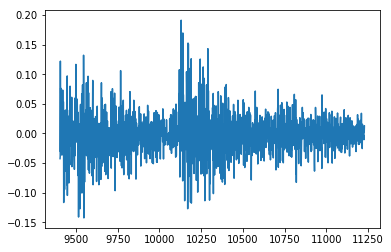

In [17]:
plt.plot(Diff_Price)
plt.show()

In [18]:
Diff_Price = Price_DF.loc[9403:11228,' value'].apply(np.log).diff()

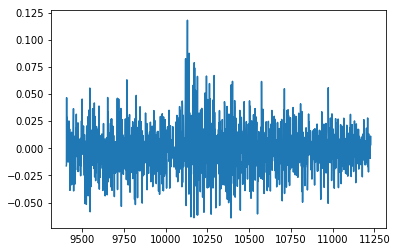

In [19]:
plt.plot(Diff_Price)
plt.show()

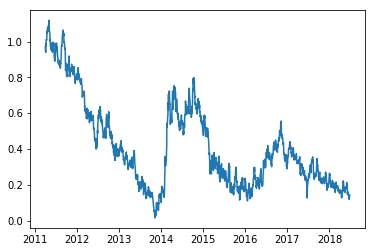

In [20]:
plt.plot(Price_DF.loc[9403:11228,'date'], Price_DF.loc[9403:11228,' value'].apply(np.log))
plt.show()

In [21]:
Price_t = Price_DF.loc[9403:11227, ' value']
Price_t_k = Price_DF.loc[9404:11228, ' value']
print(len(Price_t))
print(len(Price_t_k))

1825
1825


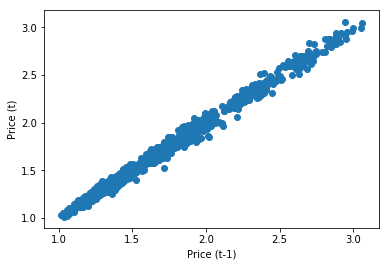

In [22]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-1)')
plt.ylabel('Price (t)')
plt.show()

In [23]:
Price_t = Price_DF.loc[9403:11198, ' value']
Price_t_k = Price_DF.loc[9433:11228, ' value']
print(len(Price_t))
print(len(Price_t_k))

1796
1796


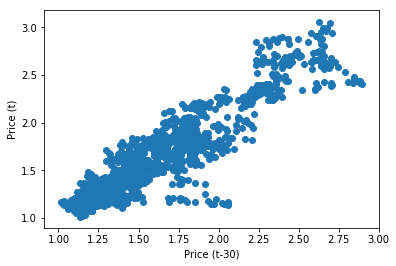

In [24]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-30)')
plt.ylabel('Price (t)')
plt.show()

In [25]:
Price_t = Price_DF.loc[9403:11168, ' value']
Price_t_k = Price_DF.loc[9463:11228, ' value']
print(len(Price_t))
print(len(Price_t_k))

1766
1766


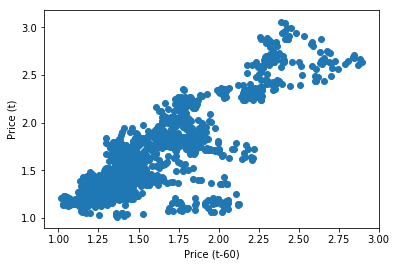

In [26]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-60)')
plt.ylabel('Price (t)')
plt.show()


In [27]:
Price_DF.set_index('date', inplace=True)


In [28]:
Price_DF[' value'] = Price_DF[' value'].apply(np.log)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D. value   No. Observations:                 1824
Model:                ARIMA(10, 1, 1)   Log Likelihood                4587.954
Method:                       css-mle   S.D. of innovations              0.020
Date:                Sat, 30 Jun 2018   AIC                          -9149.907
Time:                        03:21:49   BIC                          -9078.293
Sample:                    04-01-2011   HQIC                         -9123.489
                         - 06-25-2018                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0005      0.000     -1.216      0.224      -0.001       0.000
ar.L1.D. value      0.8957      0.069     13.074      0.000       0.761       1.030
ar.L2.D. value      0.0454      

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


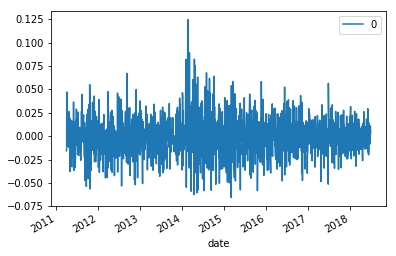

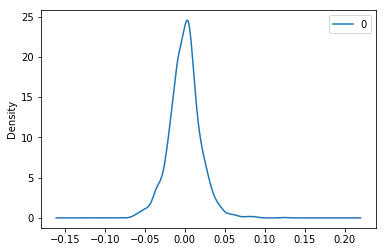

                 0
count  1824.000000
mean      0.000008
std       0.019566
min      -0.065652
25%      -0.011243
50%       0.000319
75%       0.010279
max       0.124653


In [29]:

model = ARIMA(Price_DF.iloc[9403:11228,:], order=(10,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [32]:
X = Price_DF.iloc[9403:11228,:].values
size = int(len(X)-30)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)




/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of th

NameError: name 'mean_squared_error' is not defined

Test MSE: 0.000


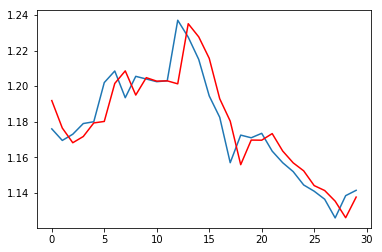

In [36]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(np.exp(test))
plt.plot(np.exp(predictions), color='red')
plt.show()

In [67]:
X = Price_DF.iloc[9403:11228,:].values
size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(10,1,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)
len(forecast)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of th

3

Test MSE: 0.006


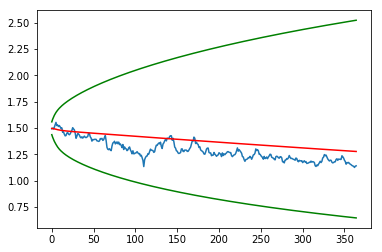

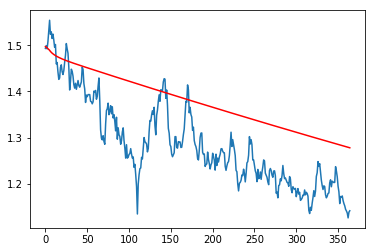

In [75]:
error = mean_squared_error(test, forecast[0])
print('Test MSE: %.3f' % error)
# plot
plt.plot(np.exp(test))
plt.plot(np.exp(forecast[0]), color='red')
plt.plot(np.exp(forecast[2]), color='green')
plt.show()

plt.plot(np.exp(test))
plt.plot(np.exp(forecast[0]), color='red')
plt.show()

In [76]:
len(test)

365